In [1]:
import numpy as np
import matplotlib.pyplot as plt

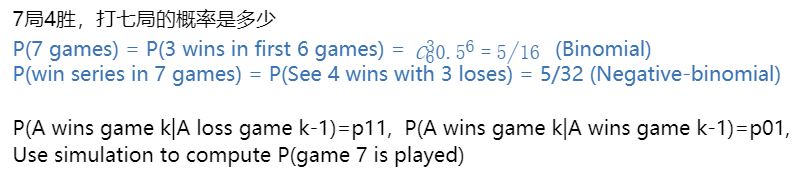

In [2]:
p=0.5
p_01=0.6
p_11=0.4

def who_wins(p):
    u=np.random.rand()
    return u>p
    

def game():
    n=0
    A_win=0
    B_win=0
    A_last_game=None
    
    while True:        
        if A_last_game is None:
            A_last_game = who_wins(p)
        elif A_last_game==1:
            A_last_game = who_wins(p_01)
        else:
            A_last_game = who_wins(p_11)
        
        n=n+1
        A_win+=A_last_game
        B_win+=1-A_last_game
        
        if A_win==4 or B_win==4:
            return n

In [3]:
sum([game()//7 for i in range(1000)])/1000

0.355

In [4]:
int(True)

1

### 模拟 dice

In [5]:
values = [1, 2, 3, 4, 5, 6]
probs = [0.1, 0.2, 0.2, 0.2, 0.2, 0.1]
sample = np.random.choice(values, p=probs)

In [6]:
dice_roll = np.random.randint(1, 7)
dice_roll

4

### 模拟硬币
* https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/

In [7]:
def coin_flip(p=0.5):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p) 
       
    #return flip to be added to numpy array    
    return result

coin_flip()

1

In [8]:
n = 1
p = 0.5
np.random.binomial(n,p)

0

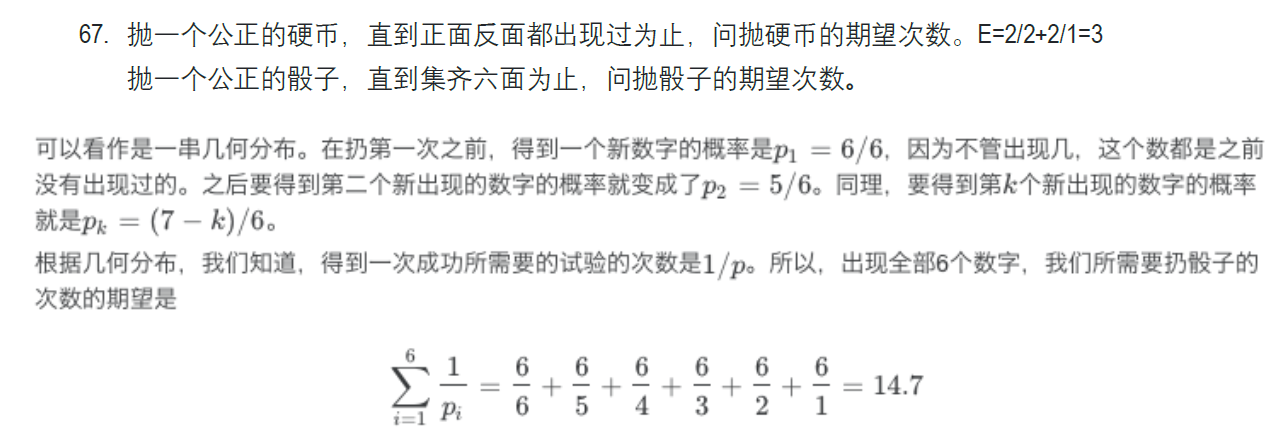

6个fair coin，每天扔一次，直到6个面都H朝上（前一天H朝上的不再扔），求期望多少天能完成游戏；Intuitively是多少天；Python写模拟过程；从这个过程和数据pattern来看，你有什么启发？?

In [9]:
def simulate_days(n_coins):
    remain = n_coins # remain count not H
    days = 0
    while remain > 0:
        days += 1
        N = remain
        for i in range(N):
            result = coin_flip()
            if result == 1: # head
                remain -= 1
            if remain == 0:
                break
        
    return days

4.03773


(array([1.7727e+04, 5.0093e+04, 2.3094e+04, 6.7690e+03, 1.7230e+03,
        4.5400e+02, 9.5000e+01, 3.5000e+01, 8.0000e+00, 2.0000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

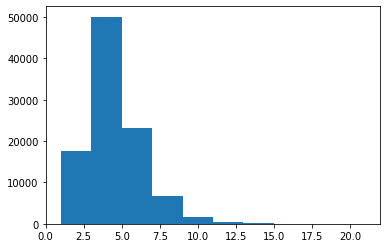

In [25]:
n_coins = 6

days_list = []
for i in range(100000):
    days = simulate_days(n_coins)
    days_list.append(days)

print(np.mean(days_list))
plt.hist(days_list)